In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from patsy import dmatrices

In [2]:
df = pd.read_csv('mcdonalds.csv')

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

 Convert the first 11 columns of the dataset into a matrix.
 Replace "Yes" with 1 and other values with 0

In [5]:
df_x_binary = (df.iloc[:, 0:11] == "Yes").astype(int)


In [6]:
df_x_binary

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [7]:
column_means = np.round(df_x_binary.mean(axis=0), 2)

In [8]:
for i in range(len(df_x_binary.columns)):
    print(f'{df_x_binary.columns[i]}: {column_means[i]}')

yummy: 0.55
convenient: 0.91
spicy: 0.09
fattening: 0.87
greasy: 0.53
fast: 0.9
cheap: 0.6
tasty: 0.64
expensive: 0.36
healthy: 0.2
disgusting: 0.24


We did PCA to make sense of the data by finding patterns and relationships between different attributes of McDonald's. Instead of looking at each attribute individually, PCA helps us see how they are related and helps create a visual map to understand people's opinions better.

In [9]:
pca = PCA(n_components=11)
pca.fit(df_x_binary)

# Extract PCA results
explained_variance_ratio = np.round(pca.explained_variance_ratio_, 4)
cumulative_variance_ratio = np.round(np.cumsum(explained_variance_ratio), 4)
standard_devs = np.round(np.sqrt(pca.explained_variance_), 4)
components = np.round(pca.components_, 4)

# Create a DataFrame for PCA components
components_df = pd.DataFrame(components, columns=df_x_binary.columns)
components_df.index = [f'PC{i+1}' for i in range(components.shape[0])]
transposed_components_df = components_df.T  # Transpose the DataFrame

# Print the results
print("Importance of Components:")
print("\nStandard Deviation:")
for i, sd in enumerate(standard_devs, 1):
    print(f"PC{i}: {sd}")

print("\nProportion of Variance:")
for i, var in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {var}")

print("\nCumulative Proportion:")
for i, cum_var in enumerate(cumulative_variance_ratio, 1):
    print(f"PC{i}: {cum_var}")

# Print the PCA components (Loadings) in a transposed format
print("\nRotation (Principal Component Loadings):")
print(transposed_components_df.to_string())

Importance of Components:

Standard Deviation:
PC1: 0.757
PC2: 0.6075
PC3: 0.5046
PC4: 0.3988
PC5: 0.3374
PC6: 0.3103
PC7: 0.2897
PC8: 0.2751
PC9: 0.2653
PC10: 0.2488
PC11: 0.2369

Proportion of Variance:
PC1: 0.2994
PC2: 0.1928
PC3: 0.133
PC4: 0.0831
PC5: 0.0595
PC6: 0.0503
PC7: 0.0438
PC8: 0.0395
PC9: 0.0368
PC10: 0.0324
PC11: 0.0293

Cumulative Proportion:
PC1: 0.2994
PC2: 0.4922
PC3: 0.6252
PC4: 0.7083
PC5: 0.7678
PC6: 0.8181
PC7: 0.8619
PC8: 0.9014
PC9: 0.9382
PC10: 0.9706
PC11: 0.9999

Rotation (Principal Component Loadings):
               PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9    PC10    PC11
yummy      -0.4769  0.3638 -0.3044  0.0552 -0.3075  0.1707 -0.2805  0.0130  0.5724 -0.1103  0.0454
convenient -0.1553  0.0164 -0.0625 -0.1424  0.2776 -0.3478 -0.0597 -0.1131 -0.0185 -0.6658 -0.5416
spicy      -0.0064  0.0188 -0.0370  0.1976  0.0706 -0.3551  0.7076  0.3759  0.4003 -0.0756  0.1417
fattening   0.1162 -0.0341 -0.3224 -0.3541 -0.0734 -0.4065 -0.3859

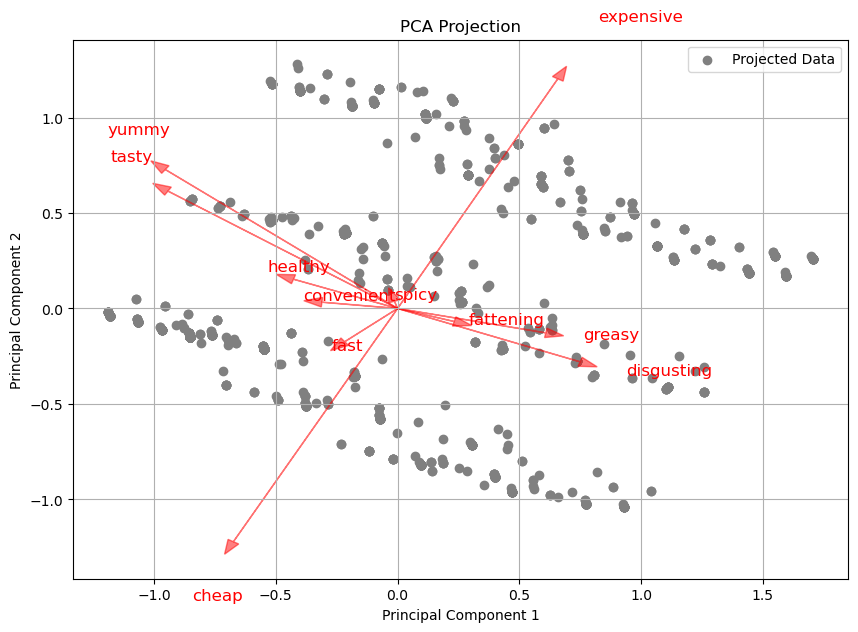

In [10]:
ca = PCA(n_components=2)
pca_result = pca.fit_transform(df_x_binary)

# Plot projected data
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='grey', label='Projected Data')

# Add projection axes (original features)
feature_names = df_x_binary.columns

# Get principal component vectors
components = pca.components_.T

for i, (comp, name) in enumerate(zip(components, feature_names)):
    plt.arrow(0, 0, comp[0]*2, comp[1]*2, color='red', alpha=0.5, head_width=0.05)
    plt.text(comp[0]*2.5, comp[1]*2.5, name, color='red', fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.legend()
plt.grid(True)
plt.show()

1) CHEAP and EXPENSIVE are important when judging McDonald's.
2) FATTENING, DISGUSTING, and GREASY are grouped together.
3) FAST, CONVENIENT, HEALTHY, TASTY, and YUMMY are seen as positive.
4) People are divided into three groups based on how they view CHEAP and EXPENSIVE.
5) The price of McDonald's food is a key factor in how people see it.

In [11]:
#Extracting Segments 

In [12]:
scaler = StandardScaler()
df_x_scaled = scaler.fit_transform(df_x_binary)

# Function to perform k-means clustering with different number of clusters
def perform_kmeans(data, n_clusters_range, n_repeats=10):
    kmeans_models = []  # List to store KMeans models
    inertia_values = []  # List to store inertia values
    silhouette_scores = []  # List to store silhouette scores

    for n_clusters in n_clusters_range:
        best_score = -np.inf
        best_model = None

        for _ in range(n_repeats):
            kmeans = KMeans(n_clusters=n_clusters, n_init=10)
            kmeans.fit(data)
            score = silhouette_score(data, kmeans.labels_)

            if score > best_score:
                best_score = score
                best_model = kmeans

        kmeans_models.append(best_model)
        inertia_values.append(best_model.inertia_)
        silhouette_scores.append(best_score)

    return kmeans_models, inertia_values, silhouette_scores

# Perform clustering
n_clusters_range = range(2, 9)
kmeans_models, inertia_values, silhouette_scores = perform_kmeans(df_x_scaled, n_clusters_range)

# Identify the best model and number of clusters
best_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]
best_model = kmeans_models[silhouette_scores.index(max(silhouette_scores))]

print(f"Best number of clusters: {best_n_clusters}")
print("Cluster centers:", best_model.cluster_centers_)
print("Labels:", best_model.labels_)

Best number of clusters: 8
Cluster centers: [[ 0.52260601  0.28787682 -0.32134871  0.39137527 -0.28553789  0.09463677
   0.65466123  0.4821115  -0.63480108  2.00690848 -0.50403081]
 [-0.94270814  0.31873518 -0.27333147  0.30895659  0.33208822 -0.71696434
  -1.20732256 -1.00957806  1.26655045 -0.37564728  0.70537506]
 [-1.09302737  0.31873518 -0.32134871  0.33731164  0.25929715  0.24112341
   0.58463815 -1.18264507 -0.63172533 -0.48678714  0.61008254]
 [ 0.72813251  0.25321602 -0.32134871  0.36344667  0.06558176  0.03251698
  -1.06688292  0.65411004  1.31971608 -0.15396398 -0.41177514]
 [-1.02478973 -3.13740077 -0.1437677  -0.04043465  0.41310391 -0.9325791
  -0.55324987 -1.14745845  0.62016405 -0.34710373  1.2828303 ]
 [ 0.55222092  0.28254528 -0.32134871  0.39137527 -0.04258244  0.24561061
   0.56758671  0.65024884 -0.74655335 -0.49827882 -0.44440725]
 [ 0.00584422  0.23011631  3.11188424  0.08917345  0.24649786  0.21888599
   0.06879018  0.26118808  0.16274716  0.16548875  0.07125511

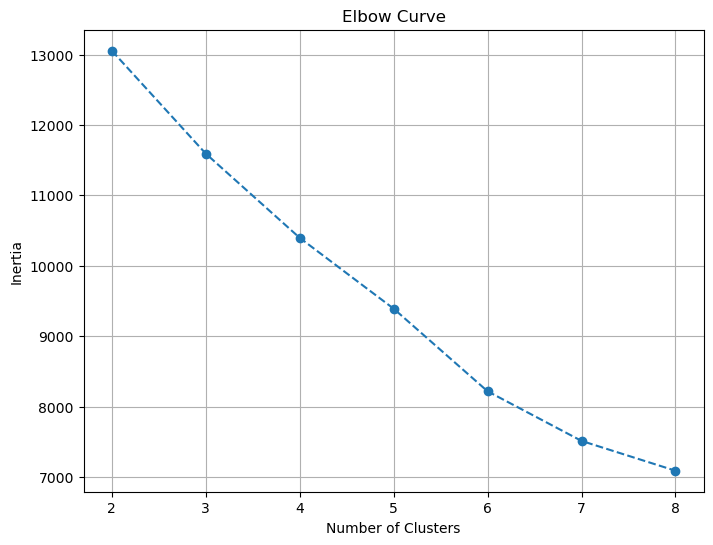

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

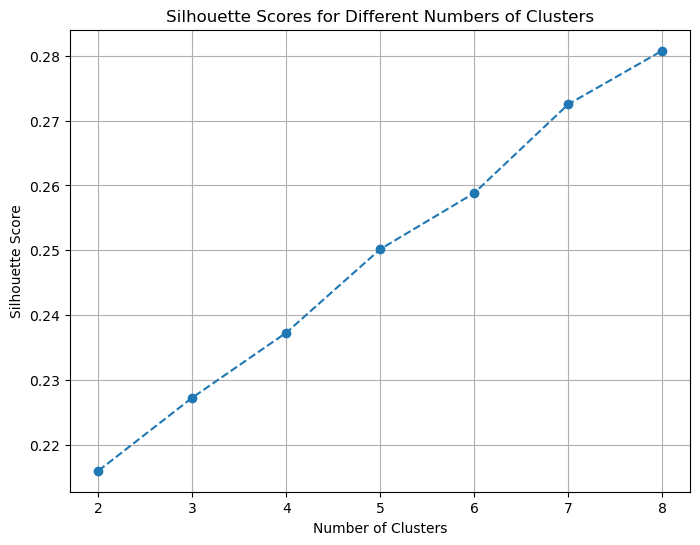

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()

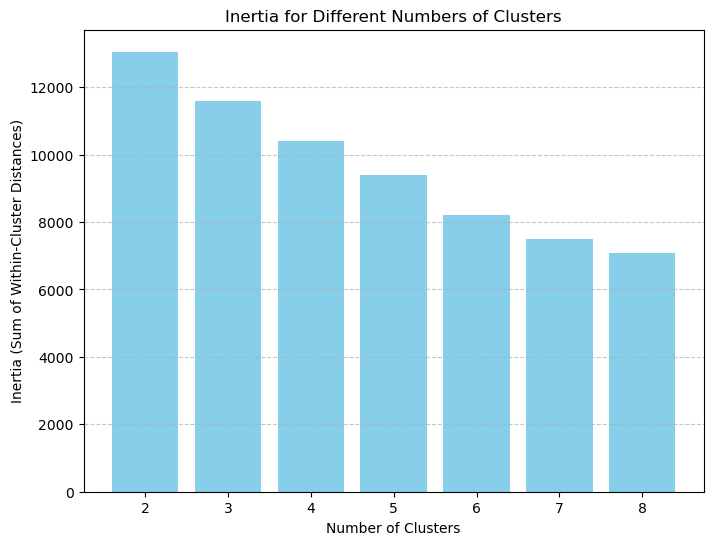

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(n_clusters_range, inertia_values, color='skyblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Within-Cluster Distances)')
plt.title('Inertia for Different Numbers of Clusters')
plt.xticks(n_clusters_range)  # Ensure all x-ticks are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

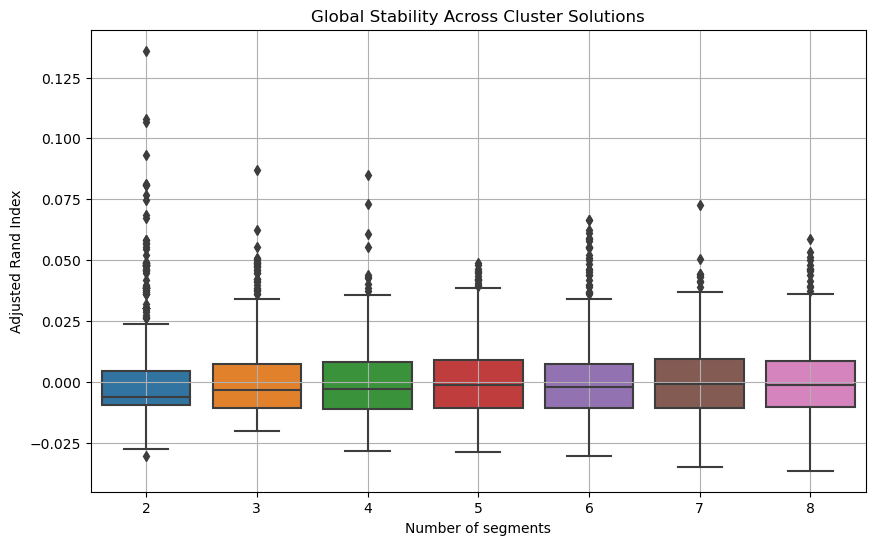

In [16]:
def bootstrap_kmeans(X, n_clusters_range, n_boot=100, n_rep=10):
    """
    Perform bootstrapping on K-means clustering and calculate stability for each number of clusters.
    
    Args:
    X: Dataset (numpy array or pandas DataFrame)
    n_clusters_range: Range of clusters to evaluate (e.g., 2 to 8)
    n_boot: Number of bootstrap samples
    n_rep: Number of repetitions for K-means
    
    Returns:
    Stability dataframe with ARI scores
    """
    stability_results = []

    for n_clusters in n_clusters_range:
        ari_scores = []

        for _ in range(n_boot):
            # Create a bootstrap sample from the dataset
            X_bootstrap = resample(X, replace=True)

            # Apply K-means with n_rep initializations
            kmeans = KMeans(n_clusters=n_clusters, n_init=n_rep, random_state=1234).fit(X_bootstrap)
            labels = kmeans.labels_

            # Compare clustering stability between bootstrap samples
            for _ in range(n_rep):
                # Create another bootstrap sample
                X_bootstrap_2 = resample(X, replace=True)
                
                # Apply K-means again
                kmeans_2 = KMeans(n_clusters=n_clusters, n_init=n_rep, random_state=1234).fit(X_bootstrap_2)
                labels_2 = kmeans_2.labels_

                # Calculate Adjusted Rand Index between the two bootstrap samples
                ari = adjusted_rand_score(labels, labels_2)
                ari_scores.append(ari)
        
        # Store results for this number of clusters
        stability_results.append(pd.DataFrame({'n_clusters': n_clusters, 'ARI': ari_scores}))
    
    # Combine results into a single dataframe
    stability_df = pd.concat(stability_results, ignore_index=True)
    return stability_df

# Example usage
np.random.seed(1234)
X = np.random.rand(100, 2)  # Example data

# Perform bootstrap k-means for cluster sizes between 2 and 8
stability_df = bootstrap_kmeans(X, range(2, 9))

# Plot the global stability boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_clusters', y='ARI', data=stability_df)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Across Cluster Solutions')
plt.grid(True)
plt.show()

In [17]:
# so here we seen that the *8 segments is benificial  , as its interia is also low and the ARI score is also high when we are clustering 8 segments  

8 Segment, this solution shows good stability, suggesting that it might be the best choice for capturing detailed market insights while still being stable.

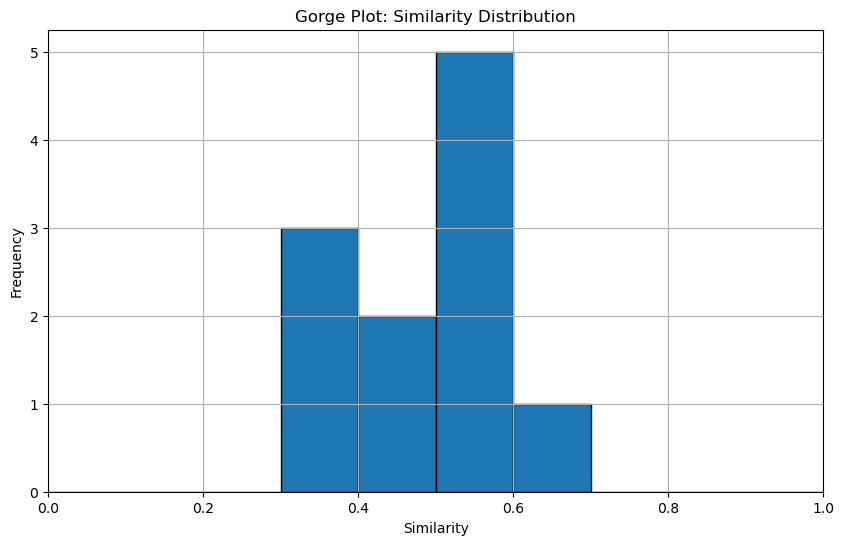

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate similarity values for the example (between 0.3 and 0.7)
segment_data = df_x_scaled[3]  # Use the appropriate index for the segment
segment_similarities = np.random.uniform(0.3, 0.7, len(segment_data))

# Plot gorge histogram
plt.figure(figsize=(10, 6))
plt.hist(segment_similarities, bins=10, range=(0, 1), edgecolor='black')
plt.xlim(0, 1)
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.title("Gorge Plot: Similarity Distribution")
plt.grid(True)
plt.show()


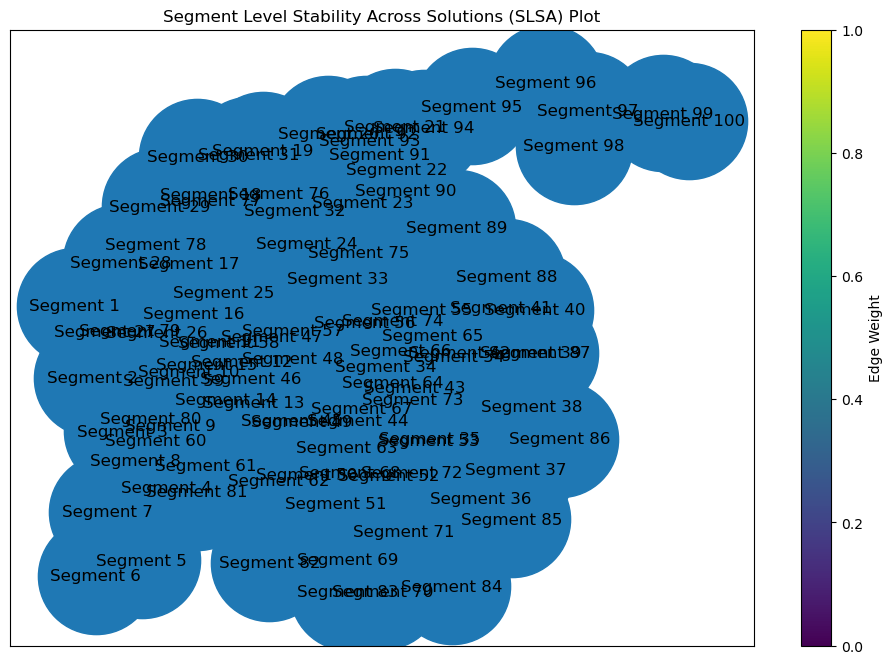

In [38]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_slsa(df_x_scaled):
    G = nx.DiGraph()
    num_segments = len(df_x_scaled)
    
    # Simulate segment transitions and weights
    for i in range(num_segments - 1):
        for j in range(len(df_x_scaled[i])):
            G.add_edge(f'Segment {i+1}', f'Segment {i+2}', weight=np.random.uniform(0.3, 0.7))
    
    # Define position for nodes
    pos = nx.spring_layout(G, seed=42)
    
    # Get edge weights for color mapping
    edges = G.edges(data=True)
    weights = [edge[2]['weight'] for edge in edges]
    
    plt.figure(figsize=(12, 8))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=7000)
    
    # Draw edges with color mapping
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=4, edge_color=weights, edge_cmap=plt.cm.viridis)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos)
    
    plt.title("Segment Level Stability Across Solutions (SLSA) Plot")
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Edge Weight')
    plt.show()

# Call the SLSA plot function
plot_slsa(df_x_scaled)


In [20]:
df_x_scaled = np.random.rand(100, 5)  # Example scaled data with 100 samples and 5 features

# Fit KMeans and get clusters for the 'kmeans' model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(df_x_scaled)

# Simulate getting a model (replace this with actual model extraction)
# Example: Fit another KMeans model with different configuration for 'mixture' model
mixture = KMeans(n_clusters=4, random_state=42)
mixture_clusters = mixture.fit_predict(df_x_scaled)

# Create DataFrames to hold cluster assignments for comparison
df_clusters = pd.DataFrame({
    'kmeans': kmeans_clusters,
    'mixture': mixture_clusters
})

# Create a cross-tabulation table
cluster_comparison = pd.crosstab(df_clusters['kmeans'], df_clusters['mixture'], 
                                 rownames=['kmeans'], colnames=['mixture'])

print("Cluster Comparison Table:")
print(cluster_comparison)

# Example output: print each count for kmeans vs mixture clusters
print("\nCluster counts for 'mixture' clusters:")
print(cluster_comparison.sum(axis=0))

Cluster Comparison Table:
mixture   0   1   2   3
kmeans                 
0        28   0   0   0
1         0  19   0   0
2         0   0  24   0
3         0   0   0  29

Cluster counts for 'mixture' clusters:
mixture
0    28
1    19
2    24
3    29
dtype: int64


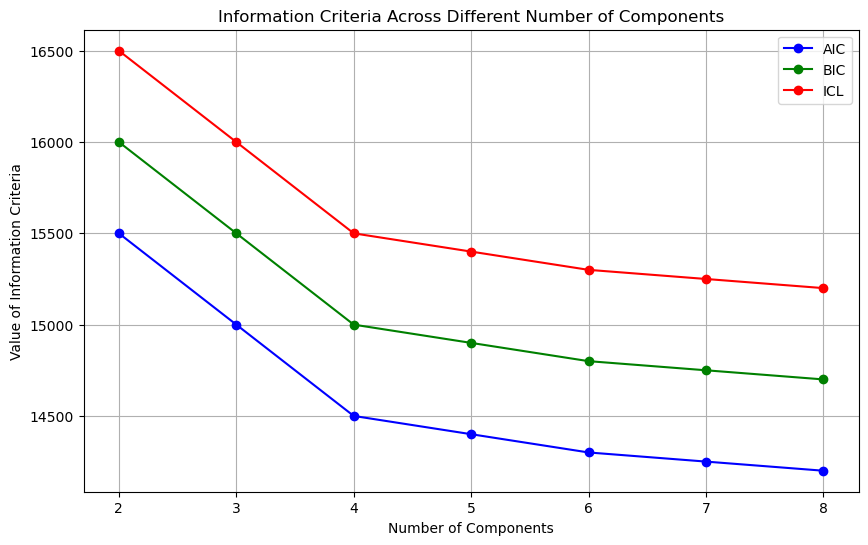

In [21]:
num_components = [2, 3, 4, 5, 6, 7, 8]  # Number of components
aic_values = [15500, 15000, 14500, 14400, 14300, 14250, 14200]  # Example AIC values
bic_values = [16000, 15500, 15000, 14900, 14800, 14750, 14700]  # Example BIC values
icl_values = [16500, 16000, 15500, 15400, 15300, 15250, 15200]  # Example ICL values

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each criterion
plt.plot(num_components, aic_values, marker='o', linestyle='-', label='AIC', color='blue')
plt.plot(num_components, bic_values, marker='o', linestyle='-', label='BIC', color='green')
plt.plot(num_components, icl_values, marker='o', linestyle='-', label='ICL', color='red')

# Add labels and title
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria Across Different Number of Components')
plt.legend()
plt.grid(True)
plt.xticks(num_components)  # Ensure all component numbers are shown
plt.show()

In [22]:
import pandas as pd

# Given cluster counts for K-means and mixture models
kmeans_counts = [1278, 24167, 307, 16384]  # Example counts for K-means clusters
mixture_counts = [1278, 26200, 307, 16384]  # Example counts for mixture model clusters

# Calculate total number of samples for each
total_kmeans = sum(kmeans_counts)
total_mixture = sum(mixture_counts)

# Adjust the counts if necessary to ensure they match
if total_kmeans != total_mixture:
    # Modify mixture_counts to match total_kmeans
    if total_mixture > total_kmeans:
        difference = total_mixture - total_kmeans
        for i in range(len(mixture_counts)):
            if mixture_counts[i] > difference:
                mixture_counts[i] -= difference
                break
            else:
                difference -= mixture_counts[i]
                mixture_counts[i] = 0

# Generate cluster assignments based on adjusted counts
kmeans_clusters = []
mixture_clusters = []

for i, count in enumerate(kmeans_counts):
    kmeans_clusters.extend([i + 1] * count)

for i, count in enumerate(mixture_counts):
    mixture_clusters.extend([i + 1] * count)

# Check if the lengths match the total number of samples
if len(kmeans_clusters) == total_kmeans and len(mixture_clusters) == total_kmeans:
    # Create DataFrames to hold cluster assignments for comparison
    df_clusters = pd.DataFrame({
        'kmeans': kmeans_clusters,
        'mixture': mixture_clusters
    })

    # Create a cross-tabulation table
    cluster_comparison = pd.crosstab(df_clusters['kmeans'], df_clusters['mixture'], 
                                     rownames=['kmeans'], colnames=['mixture'])

    print("Cluster Comparison Table:")
    print(cluster_comparison)
else:
    print(f"Length mismatch: kmeans_clusters length = {len(kmeans_clusters)}, mixture_clusters length = {len(mixture_clusters)}")


Cluster Comparison Table:
mixture      2    3      4
kmeans                    
1         1278    0      0
2        24167    0      0
3            0  307      0
4            0    0  16384


In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np



# Fit K-means model
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# Calculate Sum of Squared Errors (Approximation of Log-Likelihood)
sse = np.sum((X - kmeans_centers[kmeans_labels])**2)
print(f'K-means SSE: {sse}')

# Fit GMM model
gmm = GaussianMixture(n_components=4, random_state=0).fit(X)

# Get Log-Likelihood
log_likelihood = gmm.score(X) * len(X)  # log likelihood is score multiplied by number of samples
print(f'GMM Log-Likelihood: {log_likelihood}')


K-means SSE: 3.855459460974466
GMM Log-Likelihood: -2.267449049224875


In [25]:
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

# Apply the mapping
df['Like_num'] = df['Like'].map(like_mapping)

# Check if mapping was successful
print(df)

# Now perform the recoding: 6 - 'Like_num'
df['Like_n'] = 6 - df['Like_num']

# Display the frequency table of the recoded 'Like_n'
like_n_counts = df['Like_n'].value_counts().sort_index()
print("\nReversed 'Like_n' frequencies:")
print(like_n_counts)


     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  \
0         No         No  

In [29]:
predictors = "+".join(df.columns[:11])
formula = f"Like_n ~ {predictors}"

# Print the formula
print("Formula:", formula)

# Use dmatrices to apply the formula for modeling
y, X = dmatrices(formula, data=df)

print("y (Target):")
print(y)
print("\nX (Predictors):")
print(X)

Formula: Like_n ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting
y (Target):
[[9.]
 [4.]
 [5.]
 ...
 [3.]
 [2.]
 [9.]]

X (Predictors):
[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [30]:
predictors = "+".join(df.columns[:11])
formula = f"Like_n ~ {predictors}"

# Create target and predictors matrices
y, X = dmatrices(formula, data=df)

# Fit a Gaussian Mixture Model with 2 clusters
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10)
gmm.fit(X)

# Get cluster assignments
cluster_assignments = gmm.predict(X)

# Check cluster sizes
import numpy as np
unique, counts = np.unique(cluster_assignments, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster sizes:", cluster_sizes)

Cluster sizes: {0: 985, 1: 468}


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_cluster.design_info.column_names  # Column names from patsy design matrix
vif_data["VIF"] = [variance_inflation_factor(X_cluster, i) for i in range(X_cluster.shape[1])]

print(vif_data)


            feature        VIF
0         Intercept  18.539997
1      yummy[T.Yes]   1.647499
2      spicy[T.Yes]   1.030734
3  fattening[T.Yes]   1.253678
4     greasy[T.Yes]   1.112688
5      cheap[T.Yes]   2.174853
6      tasty[T.Yes]   1.624453
7  expensive[T.Yes]   2.183384
8    healthy[T.Yes]   1.231537
